<a href="https://colab.research.google.com/github/LeonardoCorreia08/sinal_audio/blob/main/Sinais_de_Audios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalar Bibliotecas

In [ ]:
!pip install librosa

In [ ]:
pip install matplotlib

# Biblioteca Importadas


In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Path


In [33]:
# Caminho para o arquivo de áudio
file_path = "cmajor.wav"
# Carregar o áudio usando a biblioteca librosa
signal, sr = librosa.load(file_path, sr=None)
# Carregar o sinal de áudio a partir do arquivo
sinal, sr = load_audio(file_path)

# Funções

In [43]:
# Função para carregar o áudio a partir do arquivo
def load_audio(file_path):
  signal, sr = librosa.load(file_path, sr=None)
  return signal, sr

# Função para plotar o gráfico do sinal de áudio
def plot_waveform(signal, sr):
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(signal, sr=sr)
  plt.title("Sinal de Áudio")  # Título do gráfico
  plt.xlabel("Tempo (s)")    # Rótulo do eixo x (tempo)
  plt.ylabel("Amplitude")    # Rótulo do eixo y (amplitude)
  plt.show()

# Função para calcular a Transformada de Fourier de um sinal
def compute_fft(signal):
    fft_result = np.fft.fft(signal)
    return fft_result

# Função para plotar o gráfico da Transformada de Fourier
def plot_fft(fft_result, sr):
    # Calcula as frequências correspondentes aos valores da Transformada de Fourier
    freqs = np.fft.fftfreq(len(fft_result), 1/sr)

    # Calcula a magnitude da Transformada de Fourier (módulo dos valores)
    magnitude = np.abs(fft_result)
    # Cria o gráfico da Transformada de Fourier
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, magnitude)
    plt.title(" Fourier")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 500)  # Limita o eixo x para exibir até 500 Hz
    plt.show()

def plot_spectrogram(signal, sr):
    # Calcula o espectrograma do sinal usando a Transformada de Fourier de curta duração (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

    # Cria uma figura para o gráfico do espectrograma
    plt.figure(figsize=(10, 4))

    # Plota o espectrograma usando a função "librosa.display.specshow"
    # O eixo y será linear (linearmente espaçado em Hz)
    # O eixo x será o tempo
    # O mapa de cores será convertido para escala de decibéis ("dB")
    librosa.display.specshow(D, y_axis='linear', sr=sr, x_axis='time')

    # Adiciona uma barra de cores para representar as amplitudes em decibéis
    plt.colorbar(format='%+2.0f dB')

    # Define os limites do eixo x para 0 a 2000 (em segundos)
    #plt.xlim(0, 2000)

    # Define os limites do eixo y para 0 a 15 (em Hz)
    #plt.ylim(0, 15)

    # Adiciona rótulos aos eixos x e y
    plt.xlabel('Tempo')
    plt.ylabel('Frequência')

    # Adiciona um título ao gráfico
    plt.title('Espectrograma')

    # Exibe o gráfico do espectrograma
    plt.show()


# Sinais de áudio

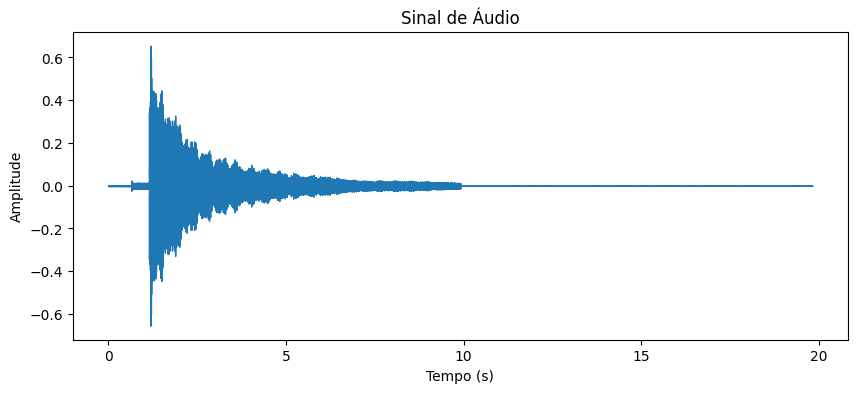

In [37]:
# Plotar o sinal de áudio
plot_waveform(sinal, sr)

# T de Fourier


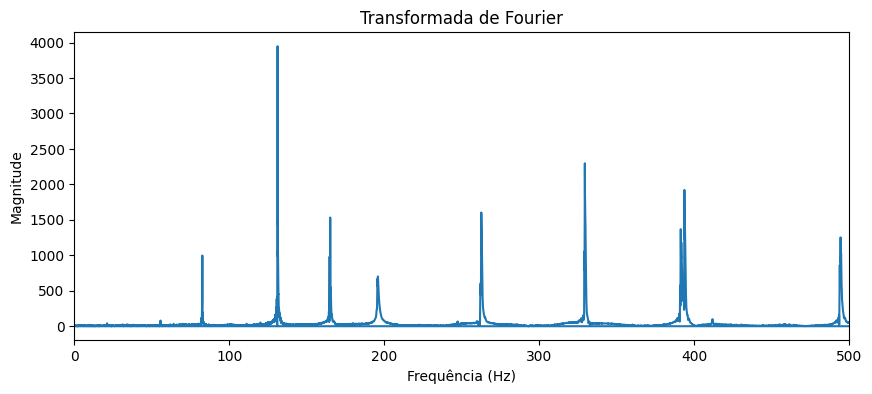

In [39]:
fft_result = compute_fft(signal)
plot_fft(fft_result, sr)


#Espectrograma

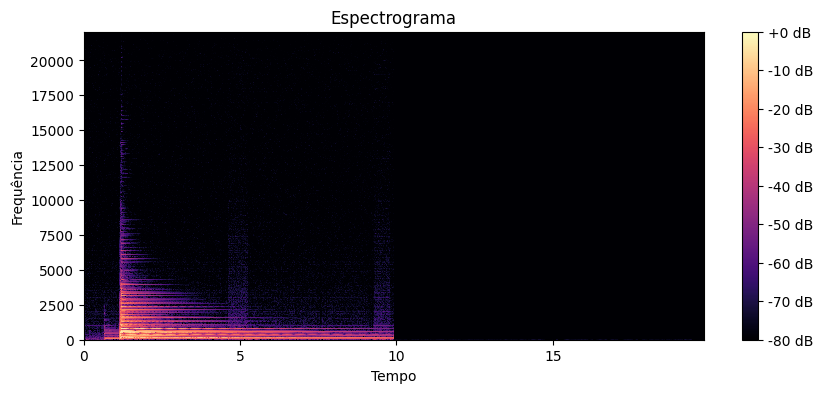

In [44]:
plot_spectrogram(signal, sr)

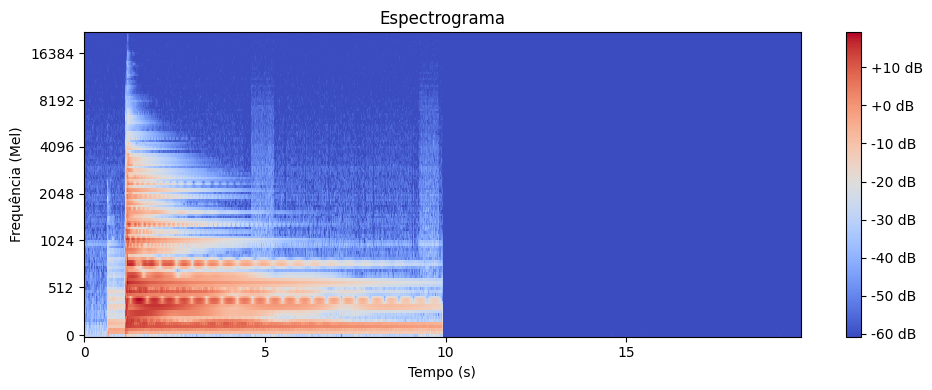

In [45]:
# Calcular o espectrograma usando a função "librosa.feature.melspectrogram"
spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)

# Converter o espectrograma para decibéis (dB) usando a função "librosa.power_to_db"
spectrogram_db = librosa.power_to_db(spectrogram)

# Plotar o espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, hop_length=512)

# Adiciona a barra de cores para a escala de decibéis
plt.colorbar(format='%+2.0f dB')

# Adiciona o título ao gráfico
plt.title("Espectrograma")

# Rótulo do eixo x (tempo)
plt.xlabel("Tempo (s)")

# Rótulo do eixo y (frequência)
plt.ylabel("Frequência (Mel)")

# Ajusta o layout para evitar cortes de texto
plt.tight_layout()

# Exibe o gráfico do espectrograma
plt.show()
